In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
%matplotlib inline

Carregando dataframes

In [3]:
offline_data = pd.read_json("offline_sales.json", lines=True)

In [4]:
offline_data

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN
...,...,...,...,...,...,...,...,...
29367,2018-08-31,RS,6637353,633064386463376,346433376135623,1,129.0,6.439626e+19
29368,2018-08-31,RS,6637353,633064386463376,633239313036316,1,138.0,6.439626e+19
29369,2018-08-31,RS,6637353,393832393138626,333938616133373,1,149.0,6.632647e+19
29370,2018-08-31,RS,6637353,393832393138626,366337303963646,1,109.0,6.632647e+19


In [5]:
onlineorders_data = pd.read_json("online_orders.json", lines=True)

In [6]:
onlineorders_data

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN
...,...,...,...,...,...,...,...,...
12232,2018-08-31,3.133384e+24,desktop,636136633433353,323765383935613,1,349,3.639383e+19
12233,2018-08-31,6.532624e+24,mobile,313334363633303,333437623263326,1,199,3.461394e+19
12234,2018-08-31,3.535356e+24,desktop,626166643633306,613264333961396,1,349,NaN
12235,2018-08-31,3.639664e+24,desktop,313030636530313,393665363031353,1,149,NaN


In [7]:
onlinepageviews_data = pd.read_json("online_pageviews.json", lines=True)

In [8]:
onlinepageviews_data

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
0,2018-08-01,6.162326e+24,desktop,home,NaN,NaN,NaN
1,2018-08-01,3.538363e+24,desktop,landing_page,NaN,NaN,NaN
2,2018-08-01,3.130377e+24,mobile,subcategory,6.161393e+09,NaN,NaN
3,2018-08-01,3.130377e+24,mobile,subcategory,6.664354e+09,NaN,NaN
4,2018-08-01,3.235374e+24,desktop,landing_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3452535,2018-08-31,3.764303e+24,mobile,product,3.533344e+09,3.962384e+14,NaN
3452536,2018-08-31,3.830366e+24,desktop,subcategory,3.733386e+09,NaN,NaN
3452537,2018-08-31,6.261346e+24,mobile,subcategory,3.733386e+09,NaN,NaN
3452538,2018-08-31,6.137614e+24,mobile,subcategory,3.136306e+09,NaN,NaN


Verificando quantity diferente de 1.

In [9]:
onlineorders_data['quantity'].value_counts()

1    12209
2       26
3        2
Name: quantity, dtype: int64

In [10]:
offline_data['quantity'].value_counts()

1    28784
2      531
3       43
4       10
5        2
9        1
6        1
Name: quantity, dtype: int64

No .json foi verificado que price não está multiplicado por quantity.

Cópia dos dataframes.

In [11]:
offline_copy = offline_data.copy()
onlineorders_copy = onlineorders_data.copy()
onlinepageviews_copy = onlinepageviews_data.copy()

Criando uma nova coluna com o resultado da multiplicação entre "quantity" e "price"

In [12]:
offline_copy['total'] = offline_copy['quantity'] * offline_copy['price']
offline_copy

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,total
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN,279.0
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN,229.0
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN,179.0
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN,269.0
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...
29367,2018-08-31,RS,6637353,633064386463376,346433376135623,1,129.0,6.439626e+19,129.0
29368,2018-08-31,RS,6637353,633064386463376,633239313036316,1,138.0,6.439626e+19,138.0
29369,2018-08-31,RS,6637353,393832393138626,333938616133373,1,149.0,6.632647e+19,149.0
29370,2018-08-31,RS,6637353,393832393138626,366337303963646,1,109.0,6.632647e+19,109.0


Calculando o somatório da coluna "total" para obter o resultado de faturamento das vendas offline.

In [13]:
total_offline = offline_copy['total'].sum()
print(total_offline)

13903005.32


Realizando os mesmos passos do offline para o online_orders.

In [14]:
onlineorders_copy['total'] = onlineorders_copy['quantity'] * onlineorders_copy['price']
onlineorders_copy

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id,total
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN,839
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19,629
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19,219
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19,239
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN,69
...,...,...,...,...,...,...,...,...,...
12232,2018-08-31,3.133384e+24,desktop,636136633433353,323765383935613,1,349,3.639383e+19,349
12233,2018-08-31,6.532624e+24,mobile,313334363633303,333437623263326,1,199,3.461394e+19,199
12234,2018-08-31,3.535356e+24,desktop,626166643633306,613264333961396,1,349,NaN,349
12235,2018-08-31,3.639664e+24,desktop,313030636530313,393665363031353,1,149,NaN,149


In [15]:
total_online = onlineorders_copy['total'].sum()
print(total_online)

5649323


Calculando o valor total das vendas, somando o faturamento online e offline e calculando a porcetagem de cada uma.

In [16]:
total_on_off = total_online + total_offline
print(total_on_off)
porc_faton = 5649323 / total_on_off * 100
porc_fatoff = 13903005.32 / total_on_off * 100
print(porc_faton, porc_fatoff)

19552328.32
28.893351766302583 71.10664823369743


Gráfico do faturamento.

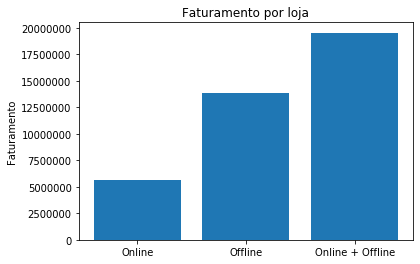

In [17]:
lojas = ["Online", "Offline", "Online + Offline"]
faturamento = [5649323, 13903005.32, 19552328.32]

plt.bar(lojas, faturamento, align='center')
plt.xticks(lojas)
plt.ylabel('Faturamento')
plt.title('Faturamento por loja')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

Agrupando "on_product_id" e somando "quantity".

In [18]:
onlineorders_object = onlineorders_copy.copy()

In [19]:
onlineorders_object = onlineorders_object.drop(["date", "visitor_id", "deviceType", "order_id", "price", "customer_id", "total"], axis=1)

In [20]:
onlineorders_object

,on_product_id,quantity
0,323762666337343,1
1,313562333039323,1
2,383863346531623,1
3,666136386663626,1
4,626533383465323,1
...,...,...
12232,323765383935613,1
12233,333437623263326,1
12234,613264333961396,1
12235,393665363031353,1


In [21]:
object_grouped = onlineorders_object.groupby('on_product_id').sum()
object_grouped.head()

,quantity
on_product_id,
303038303931323,2
303062656662333,21
303063623230393,4
303133353935633,3
303165306164386,1


Verificando qual objeto tem quantia maior.

In [22]:
object_grouped.loc[object_grouped['quantity'].idxmax()]

quantity    74
Name: 626664333563363, dtype: int64

Criando um ranking dos 5 que mais venderam.

In [23]:
object_grouped.nlargest(5, ['quantity'])

,quantity
on_product_id,
626664333563363,74
376531636530353,51
656136316465643,50
396464373131666,47
343033316438393,45


Gráfico para visualização das vendas dos produtos que mais venderam.

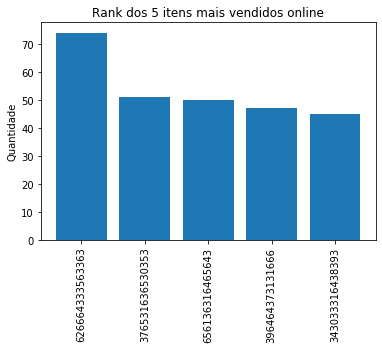

In [24]:
mais_vendidos_online = ['626664333563363', '376531636530353', '656136316465643', '396464373131666', '343033316438393']
qntd_mais_vendidos = [74, 51, 50, 47, 45]

plt.bar(mais_vendidos_online, qntd_mais_vendidos, align='center')
plt.xticks(mais_vendidos_online, rotation='vertical')
plt.ylabel('Quantidade')
plt.title('Rank dos 5 itens mais vendidos online')

plt.show()

Transformando date em dia da semana.

In [25]:
offline_copy['weekday'] = offline_copy['date'].dt.day_name()
offline_copy

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,total,weekday
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN,279.0,Wednesday
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN,229.0,Wednesday
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN,179.0,Wednesday
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN,269.0,Wednesday
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN,29.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...
29367,2018-08-31,RS,6637353,633064386463376,346433376135623,1,129.0,6.439626e+19,129.0,Friday
29368,2018-08-31,RS,6637353,633064386463376,633239313036316,1,138.0,6.439626e+19,138.0,Friday
29369,2018-08-31,RS,6637353,393832393138626,333938616133373,1,149.0,6.632647e+19,149.0,Friday
29370,2018-08-31,RS,6637353,393832393138626,366337303963646,1,109.0,6.632647e+19,109.0,Friday


Filtrando state por "RJ" e deletando colunas que não são necessárias para a análise.

In [26]:
offline_rj = offline_copy.copy()

In [27]:
offline_rj = offline_rj[(offline_rj['state'] == 'RJ')]
offline_rj

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,total,weekday
35,2018-08-01,RJ,3166353,666332643165663,336630353735346,1,99.00,3.436306e+19,99.00,Wednesday
36,2018-08-01,RJ,3166353,666332643165663,633066643833303,1,179.00,3.436306e+19,179.00,Wednesday
37,2018-08-01,RJ,3166353,616337623366613,666438663166313,1,395.78,3.531663e+19,395.78,Wednesday
38,2018-08-01,RJ,3166353,343834643430623,633162653438393,1,249.00,3.566374e+19,249.00,Wednesday
39,2018-08-01,RJ,3166353,626234316564303,396364633232663,1,299.00,3.632356e+19,299.00,Wednesday
...,...,...,...,...,...,...,...,...,...,...
29356,2018-08-31,RJ,6635613,323265353634656,623033383065356,1,798.00,6.633613e+19,798.00,Friday
29357,2018-08-31,RJ,6635613,323265353634656,663666383731653,1,798.00,6.633613e+19,798.00,Friday
29358,2018-08-31,RJ,6635613,323662376535316,363364323236313,1,538.00,6.633613e+19,538.00,Friday
29359,2018-08-31,RJ,6635613,323662376535316,623033383065356,1,798.00,6.633613e+19,798.00,Friday


In [28]:
offline_rj = offline_rj.drop(["date", "store_id", "off_product_id", "quantity", "price", "customer_id", "total"], axis=1)

Deixando apenas sale_id únicos.

In [29]:
offline_rj['sale_id'].value_counts()

323066343637353    34
336666366230343    33
616632353738303    20
613963616435656    18
376436616630373    18
                   ..
393265636661366     1
356332643165333     1
386230363065663     1
663439343566633     1
393731326536333     1
Name: sale_id, Length: 4401, dtype: int64

In [30]:
offline_rj = offline_rj.drop_duplicates(subset=['sale_id'], keep='first')
offline_rj

,state,sale_id,weekday
35,RJ,666332643165663,Wednesday
37,RJ,616337623366613,Wednesday
38,RJ,343834643430623,Wednesday
39,RJ,626234316564303,Wednesday
40,RJ,663065663766386,Wednesday
...,...,...,...
29351,RJ,393538323564373,Friday
29353,RJ,666266383238376,Friday
29354,RJ,623034666137643,Friday
29355,RJ,323265353634656,Friday


Contabilizado quantas vendas foram feitas por dia da semana e calculando total da semana, final e médias.

In [31]:
offline_rj['weekday'].value_counts()

Friday       899
Thursday     849
Wednesday    746
Saturday     725
Tuesday      579
Monday       441
Sunday       162
Name: weekday, dtype: int64

In [32]:
total_semana = 899 + 849 + 746 + 579 + 441
total_fim = 725 + 162
media_semana = total_semana / 5
media_fim = total_fim / 2
porcentagem_semana_fim = media_fim / media_semana * 100
print(total_semana, total_fim, media_semana, media_fim, porcentagem_semana_fim)

3514 887 702.8 443.5 63.10472396129767


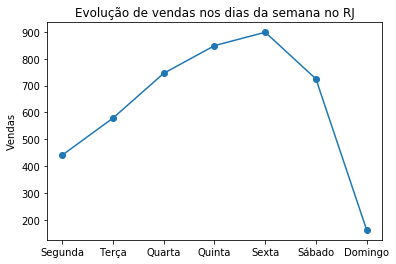

In [33]:
vendas_rj = [441, 579, 746, 849, 899, 725, 162]
dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
plt.plot(dias_semana, vendas_rj, marker='o')
plt.ylabel('Vendas')
plt.title('Evolução de vendas nos dias da semana no RJ')
plt.show()

In [34]:
pageviews_filter = onlinepageviews_copy.drop(["visitor_id", "deviceType", "category_id", "on_product_id"], axis=1)
pageviews_filter

,date,pageType,customer_id
0,2018-08-01,home,NaN
1,2018-08-01,landing_page,NaN
2,2018-08-01,subcategory,NaN
3,2018-08-01,subcategory,NaN
4,2018-08-01,landing_page,NaN
...,...,...,...
3452535,2018-08-31,product,NaN
3452536,2018-08-31,subcategory,NaN
3452537,2018-08-31,subcategory,NaN
3452538,2018-08-31,subcategory,NaN


Deletando customer_id = NaN

In [35]:
pageviews_filter = pageviews_filter.dropna()
pageviews_filter

,date,pageType,customer_id
105,2018-08-01,product,3.334316e+19
234,2018-08-01,product,3.235393e+19
268,2018-08-01,cart,3.765363e+19
282,2018-08-01,landing_page,3.165624e+19
353,2018-08-01,landing_page,3.635314e+19
...,...,...,...
3452466,2018-08-31,product,6.533327e+19
3452468,2018-08-31,subcategory,6.364394e+19
3452479,2018-08-31,subcategory,3.932384e+19
3452482,2018-08-31,subcategory,6.363656e+19


Value_counts() na coluna pageType.

In [36]:
pageviews_filter['pageType'].value_counts()

product         21151
subcategory     16626
checkout         8885
home             7501
other            6642
confirmation     5057
category         4530
landing_page     3918
cart             2495
userprofile      1677
search           1166
emptysearch       698
not_found         419
Name: pageType, dtype: int64

Filtrando "pageType" que são "product", "checkout" ou "cart".

In [37]:
pageviews_filter['customer_id'].value_counts()

6.362326e+19    1122
6.334624e+19     981
3.965644e+19     895
6.261636e+19     584
6.534324e+19     527
                ... 
3.333374e+19       1
3.733396e+19       1
3.039363e+19       1
3.831654e+19       1
6.636377e+19       1
Name: customer_id, Length: 5913, dtype: int64

Deixar apenas valores únicos na coluna customer_id.

In [38]:
pageviews_filter = pageviews_filter.drop_duplicates(subset=['customer_id'], keep='first')

O mesmo precisa ser feito para o onlineorders.

In [39]:
onlineorders_uniquecustomer = onlineorders_copy.drop_duplicates(subset=['customer_id'], keep='first')

Irei deixar apenas as colunas de customer_id nos dataframes e esses serão os passos dados a seguir. Outro passo será retirar os NaN do "customer_id" do online_orders.

In [40]:
pageviews_filter = pageviews_filter.drop(["date", "pageType"], axis=1)
onlineorders_uniquecustomer = onlineorders_uniquecustomer.drop(["date", "visitor_id", "deviceType", "order_id", "on_product_id", "quantity", "price", "total"], axis=1)

In [41]:
onlineorders_uniquecustomer = onlineorders_uniquecustomer.dropna()

In [42]:
dif_pageview_order = pd.merge(pageviews_filter, onlineorders_uniquecustomer, on='customer_id', how='outer', indicator=True)
dif_pageview_order

,customer_id,_merge
0,3.334316e+19,left_only
1,3.235393e+19,both
2,3.765363e+19,both
3,3.165624e+19,left_only
4,3.635314e+19,both
...,...,...
5908,3.330306e+19,left_only
5909,3.766394e+19,both
5910,6.438627e+19,left_only
5911,3.330396e+19,left_only


In [43]:
dif_pageview_order['_merge'].value_counts()

both          3530
left_only     2383
right_only       0
Name: _merge, dtype: int64

Na coluna merge, as linhas com left_only são as que só aparecem na pageviews e não no onlineorders, sendo que estes customer_id são os necessários para a análise. Desta forma, irei deletar os customer_id com merge diferente de left_only e depois deletar a coluna merge.
2383 customers visitaram "product", "checkout" e "cart" e não concluíram a compra (não aparecem em onlineorders). Esse último resultado será analisado juntamente com os valores de customer_id do dataframe offline.

In [44]:
dif_pageview_order = dif_pageview_order[(dif_pageview_order['_merge'] == 'left_only')]
dif_pageview_order = dif_pageview_order.drop(['_merge'], axis=1)
dif_pageview_order

,customer_id
0,3.334316e+19
3,3.165624e+19
5,6.630394e+19
6,3.061374e+19
7,6.433353e+19
...,...
5904,3.636616e+19
5906,6.638317e+19
5908,3.330306e+19
5910,6.438627e+19


Serão realizados os mesmos procedimentos no dataframe do offline, sendo deletados os customer_id como NaN, deletando as colunas que são diferentes de customer_id e também deixando apenas valores únicos na mesma coluna.

In [45]:
offline_customer = offline_copy.drop(["date", "state", "store_id", "sale_id", "off_product_id", "quantity", "price", "total", "weekday"], axis=1)
offline_customer = offline_customer.dropna()
offline_customer = offline_customer.drop_duplicates(subset=['customer_id'], keep='first')
offline_customer

,customer_id
7,3.037393e+19
8,3.039383e+19
9,3.136626e+19
10,3.265396e+19
11,3.465376e+19
...,...
29355,6.633613e+19
29362,3.064644e+19
29366,3.763626e+19
29367,6.439626e+19


Agora irei realizar o mesmo passo de unir os dataframes e verificar a diferença.

In [46]:
dif = pd.merge(dif_pageview_order, offline_customer, on='customer_id', how='outer', indicator=True)
dif

,customer_id,_merge
0,3.334316e+19,left_only
1,3.165624e+19,left_only
2,6.630394e+19,left_only
3,3.061374e+19,left_only
4,6.433353e+19,left_only
...,...,...
12144,6.633613e+19,right_only
12145,3.064644e+19,right_only
12146,3.763626e+19,right_only
12147,6.439626e+19,right_only


In [47]:
dif['_merge'].value_counts()

right_only    9766
left_only     2248
both           135
Name: _merge, dtype: int64

Calculando a porcentagem de consumidores que viram online e compraram na física.

In [48]:
porc_both = 135 / (9766 + 2248 +135) * 100
print(porc_both)

1.1112025681126019


1.11% dos consumidores visitaram online e compraram na loja física. Ou seja, não é comum ver online e comprar na loja física.

Filtrando apenas por “pageType” = cart e deltando colunas desnecessárias.

In [49]:
pageviews_cartid = onlinepageviews_copy.drop(["visitor_id", "deviceType", "category_id", "on_product_id", "date"], axis=1)
pageviews_cartid = pageviews_cartid.dropna()
pageviews_cartid = pageviews_cartid[(pageviews_cartid['pageType'] == 'cart')]
pageviews_cartid = pageviews_cartid.drop(["pageType"], axis=1)
pageviews_cartid = pageviews_cartid.drop_duplicates(subset=['customer_id'], keep='first')
pageviews_cartid

,customer_id
268,3.765363e+19
2494,3.430616e+19
2574,3.762653e+19
3470,3.135616e+19
8293,3.730394e+19
...,...
3442766,3.439373e+19
3443178,3.836333e+19
3443792,6.436653e+19
3444571,6.430624e+19


In [50]:
online_id = onlineorders_copy.drop(["date", "visitor_id", "deviceType", "order_id", "on_product_id", "quantity", "price", "total"], axis=1)
online_id = online_id.dropna()
online_id = online_id.drop_duplicates(subset=['customer_id'], keep='first')
online_id

,customer_id
1,6.339334e+19
2,3.765363e+19
3,6.533383e+19
7,6.130616e+19
8,6.263327e+19
...,...
12226,3.631393e+19
12227,3.164334e+19
12228,3.238396e+19
12232,3.639383e+19


Agora farei um merge nos dataframes para verificar se um está dentro do outro.

In [51]:
only_idpageview = pd.merge(pageviews_cartid, online_id, on='customer_id', how='outer', indicator=True)
only_idpageview

,customer_id,_merge
0,3.765363e+19,both
1,3.430616e+19,both
2,3.762653e+19,left_only
3,3.135616e+19,both
4,3.730394e+19,both
...,...,...
3794,3.139314e+19,right_only
3795,6.162333e+19,right_only
3796,3.163394e+19,right_only
3797,3.164334e+19,right_only


In [52]:
only_idpageview['_merge'].value_counts()

right_only    2702
both           828
left_only      269
Name: _merge, dtype: int64

O "left_only" representa os customer_id presentes apenas no dataframe pageviews_cartid, ou seja, 269 consumidores nao concluíram a compra. Irei filtrar esse dataframe pegando só os left_only e depois verificando em quais product_id eles aparecem no dataframe original do pageviews.

In [53]:
only_idpageview = only_idpageview[(only_idpageview['_merge'] == 'left_only')]
only_idpageview = only_idpageview.drop(['_merge'], axis=1)

In [54]:
pv_product_customerid = onlinepageviews_copy.drop(["visitor_id", "deviceType", "category_id", "date"], axis=1)
pv_product_customerid = pv_product_customerid.dropna()
pv_product_customerid = pv_product_customerid[(pv_product_customerid['pageType'] == 'product')]
pv_product_customerid = pv_product_customerid.drop(["pageType"], axis=1)
pv_product_customerid

,on_product_id,customer_id
105,3.232393e+14,3.334316e+19
234,3.330304e+14,3.235393e+19
569,6.261364e+14,6.632364e+19
795,6.435303e+14,3.731354e+19
1319,3.638374e+14,3.561334e+19
...,...,...
3452305,3.362324e+14,3.033304e+19
3452373,3.065663e+14,3.166313e+19
3452390,3.865626e+14,3.034304e+19
3452420,3.066363e+14,6.434314e+19


In [55]:
only_productwithcust = pd.merge(pv_product_customerid, only_idpageview, on='customer_id', how='outer', indicator=True)

In [56]:
only_productwithcust

,on_product_id,customer_id,_merge
0,3.232393e+14,3.334316e+19,left_only
1,3.363643e+14,3.334316e+19,left_only
2,3.035334e+14,3.334316e+19,left_only
3,3.666347e+14,3.334316e+19,left_only
4,3.035334e+14,3.334316e+19,left_only
...,...,...,...
21097,NaN,6.133343e+19,right_only
21098,NaN,6.234663e+19,right_only
21099,NaN,3.666343e+19,right_only
21100,NaN,6.539634e+19,right_only


In [57]:
only_productwithcust['_merge'].value_counts()

left_only     18522
both           2524
right_only       56
Name: _merge, dtype: int64

In [58]:
only_productwithcust = only_productwithcust[(only_productwithcust['_merge'] == 'left_only')]
only_productwithcust = only_productwithcust.drop(['_merge'], axis=1)
only_productwithcust

,on_product_id,customer_id
0,3.232393e+14,3.334316e+19
1,3.363643e+14,3.334316e+19
2,3.035334e+14,3.334316e+19
3,3.666347e+14,3.334316e+19
4,3.035334e+14,3.334316e+19
...,...,...
21039,3.330396e+14,3.261334e+19
21040,3.230624e+14,3.035357e+19
21042,3.938653e+14,3.662393e+19
21044,6.334663e+14,3.465643e+19


Agora vou deletar a coluna do customer_id por não precisar mais dela. Os próximos passos serão realizados para pegar o preço de cada "on_product_id" do dataframe only_productwithcust.

In [59]:
only_productwithcust = only_productwithcust.drop(['customer_id'], axis=1)

Pegarei o dataframe de onlineorders e deixarei apenas as colunas únicas de on_product_id e price. Depois disso, concatenarei os preços entre os dataframes.

In [60]:
order_productprice = onlineorders_copy.drop(['date', 'visitor_id', 'deviceType', 'order_id', 'quantity', 'customer_id', 'total'], axis=1)
order_productprice = order_productprice.drop_duplicates(subset=['on_product_id'], keep='first')
order_productprice

,on_product_id,price
0,323762666337343,839
1,313562333039323,629
2,383863346531623,219
3,666136386663626,239
4,626533383465323,69
...,...,...
12195,663661323436656,599
12197,643161333961346,599
12219,363833663437633,728
12221,343030356165303,299


In [61]:
only_productwithcust = only_productwithcust.join(order_productprice.set_index("on_product_id").loc[:, ["price"]], on="on_product_id")

Com os preços para cada produtos, agora é só realizar a soma da coluna "price" e aplicar o desconto de 20% para verificar o possível faturamento da campanha.

In [62]:
faturamento_pageview = only_productwithcust['price'].sum()
print(faturamento_pageview)
faturamento_campanha = faturamento_pageview * 0.8
print(faturamento_campanha)

9813668.0
7850934.4


Gráfico comparativo com diferentes tipos de engajamento dos clientes com a campanha, caso 100%, 75%, 50% e 25% dos clientes comprassem os itens.

In [63]:
fat75 = faturamento_campanha * 0.75
fat50 = faturamento_campanha * 0.50
fat25 = faturamento_campanha * 0.25
print(fat75, fat50, fat25)

5888200.800000001 3925467.2 1962733.6


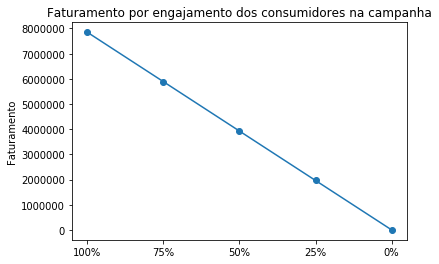

In [64]:
porc_faturamento = [faturamento_campanha, fat75, fat50, fat25, 0]
engajamento = ['100%', '75%', '50%', '25%', '0%']
plt.plot(engajamento, porc_faturamento, marker='o')
plt.ylabel('Faturamento')
plt.title('Faturamento por engajamento dos consumidores na campanha')
plt.show()